In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import f1_score, recall_score,precision_score,cohen_kappa_score
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

In [15]:
df_fake = pd.read_csv('generated/results_get_fake_built.csv')
df_real = pd.read_csv('generated/results_get_real_built.csv')

cv = CountVectorizer()
X_fake = cv.fit_transform(df_fake['1']).toarray()
X_real = cv.fit_transform(df_real['1']).toarray()
X = np.append(X_fake, X_real, axis=0)
print(X.shape)

y_fake = df_fake['0']
y_real = df_real['0']
y = np.append(y_fake, y_real, axis=0)

X_train_fake, X_test_fake, y_train_fake, y_test_fake = train_test_split(X_fake, y_fake, test_size=0.3, random_state = 42)

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.3, random_state = 42)

X_train = np.append(X_train_fake, X_train_real, axis=0)
X_test = np.append(X_test_fake, X_test_real, axis=0)
y_train = np.append(y_train_fake, y_train_real, axis=0)
y_test = np.append(y_test_fake, y_test_real, axis=0)

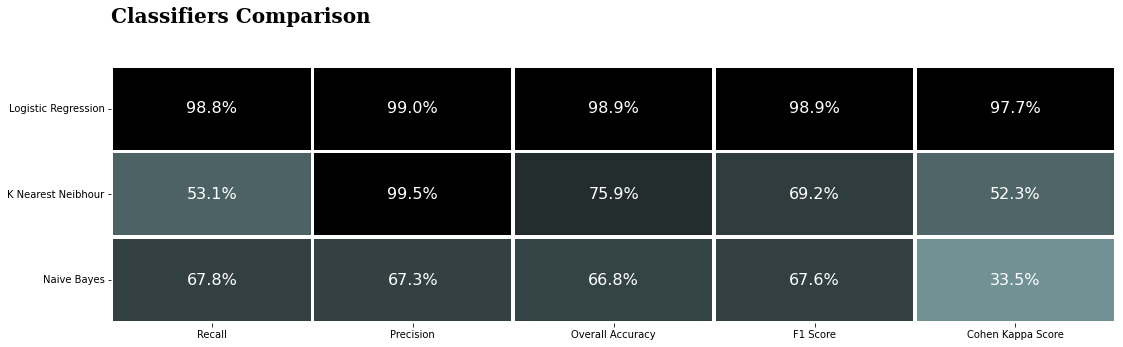

In [16]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K Nearest Neibhour': KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p=2),
    'Naive Bayes': GaussianNB() 
}

accuracy_list = []
f1_score_list = []
recall_list = []
precision_list = []
cohen_kappa_list = []

for model in classifiers.values():

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    recall_list.append(recall_score(y_test,y_pred))
    precision_list.append(precision_score(y_test,y_pred))
    accuracy_list.append(accuracy_score(y_test,y_pred))
    f1_score_list.append(f1_score(y_test,y_pred))
    cohen_kappa_list.append(cohen_kappa_score(y_test,y_pred))

df = pd.DataFrame([recall_list, precision_list, accuracy_list, f1_score_list, cohen_kappa_list])
new_df = df.transpose()
new_df.columns = ['Recall','Precision','Overall Accuracy','F1 Score','Cohen Kappa Score']
new_df.index = classifiers.keys()

colors = matplotlib.colors.LinearSegmentedColormap.from_list("", [(0, 'powderblue'), (1, 'black')])
cmappable = ScalarMappable(norm=Normalize(0,1), cmap=colors)

background_color = "white"
fig = plt.figure(figsize=(18,26)) 
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])
sns.heatmap(new_df, cmap=colors, annot=True, fmt=".1%", vmin=0, vmax=0.95, linewidths=2.5, cbar=False ,ax=ax0, annot_kws={"fontsize":16})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.text(0,-0.5,'Classifiers Comparison', fontsize=20, fontweight='bold', fontfamily='serif')
plt.show()

In [17]:
lgc = LogisticRegression()
lgc.fit(X_train,y_train)
y_pred = lgc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
cohen = cohen_kappa_score(y_test,y_pred)
print('Cohen Kappa Score',cohen)

[[387   4]
 [  5 402]]
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       391
        True       0.99      0.99      0.99       407

    accuracy                           0.99       798
   macro avg       0.99      0.99      0.99       798
weighted avg       0.99      0.99      0.99       798

Cohen Kappa Score 0.9774356718715637
